In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import neighbors

In [2]:
dataset = pd.read_csv("titanic_eda/train.csv")

In [3]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
dataset["Age"] = np.where(dataset["Age"].isnull(),28,dataset["Age"])

In [5]:
le = preprocessing.LabelEncoder()

In [6]:
dataset["Sex"] = le.fit_transform(dataset["Sex"])

In [7]:
dataset["Embarked"] = le.fit_transform(dataset["Embarked"].astype(str))

In [8]:
y=dataset["Pclass"]

In [9]:
X=dataset.drop(["Pclass","PassengerId","Name","Ticket","Cabin"],axis=1)

In [10]:
X.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,1,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,0,1,35.0,0,0,8.0500,2


In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

In [12]:
X_train.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
857,1,1,51.0,0,0,26.5500,2
52,1,0,49.0,1,0,76.7292,0
386,0,1,1.0,5,2,46.9000,2
124,0,1,54.0,0,1,77.2875,2
578,0,0,28.0,1,0,14.4583,0


In [13]:
def GetAccuracyForKNeighbors(x_train,x_test,y_train,y_test):
    acc = []
    iKValueRange = len(y_test)
    for i in range(1,iKValueRange+1):
        knn = neighbors.KNeighborsClassifier(n_neighbors=i)
        acc.append(knn.fit(x_train,y_train).score(x_test,y_test))
    return acc

In [14]:
AccuracyValues = []
iKValueRange = len(y_test)
AccuracyValues = list(GetAccuracyForKNeighbors(X_train,X_test,y_train,y_test))

Maximum accuracy: 0.8544776119402985 at k = 1


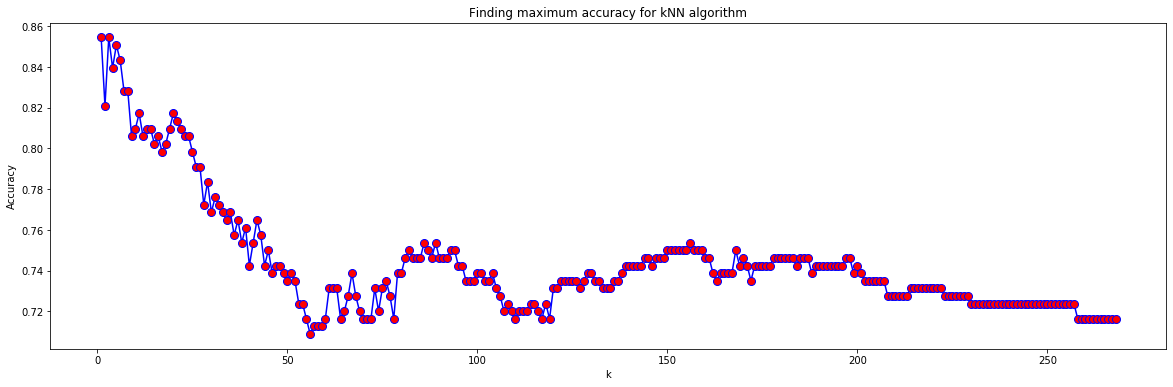

In [15]:
plt.figure(figsize=(20,6))
plt.plot(range(1,iKValueRange+1),AccuracyValues,color = 'blue',linestyle='solid', 
         marker='o',markerfacecolor='red', markersize=8)
plt.title('Finding maximum accuracy for kNN algorithm')
plt.xlabel('k')
plt.ylabel('Accuracy')
print("Maximum accuracy:", max(AccuracyValues), "at k =", AccuracyValues.index(max(AccuracyValues))+1)